In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#git clone https://github.com/pjreddie/darknet
!git clone https://github.com/kriyeng/darknet/
%cd darknet
!git checkout feature/google-colab

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 9.98 MiB | 19.69 MiB/s, done.
Resolving deltas: 100% (6767/6767), done.
/content/darknet
Branch 'feature/google-colab' set up to track remote branch 'feature/google-colab' from 'origin'.
Switched to a new branch 'feature/google-colab'


In [ ]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sende

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2019-08-16 11:55:59--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  41.3MB/s    in 4.2s    

2019-08-16 11:56:03 (37.3 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
objdata = '/content/drive/My Drive/Projects/BCCD/WBC-obj.data'
yolov3cfg = '/content/drive/My Drive/Projects/BCCD/yolo_custom.cfg'
preweights = '/content/darknet/darknet53.conv.74'

In [ ]:
!./darknet detector train '$objdata' '$yolov3cfg' '$preweights' -dont_show

yolov3_onecell
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 

In [1]:
saved_weights = '/content/drive/My Drive/Projects/darknet_bloodcells/backup/yolo_custom_last.weights'

In [ ]:
# Start training at the point where the last runtime finished
#!./darknet detector train '$objdata' '$yolov3cfg' '$saved_weights' -dont_show

# PredictandShow

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from matplotlib import patches

objdata = '/content/drive/My Drive/Projects/BCCD/WBC-obj.data'
yolov3cfg = '/content/drive/My Drive/Projects/BCCD/yolov3_onecell.cfg'
saved_weights = '/content/drive/My Drive/Projects/darknet_bloodcells/backup/yolov3_onecell_last.weights'

def PredictandShow(image_loc):
  original_img = cv2.imread(image_loc)
  original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
  result = !./darknet detector test '$objdata' '$yolov3cfg' '$saved_weights' '$image_loc' -dont_show
  confidence = ''
  if(('WBC' in result[-1]) & ('%' in result[-1])):
    confidence = result[-1]
  
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))                 
  newImage = cv2.imread('predictions.jpg')
  new_img = cv2.cvtColor(newImage, cv2.COLOR_BGR2RGB)
  ax[0].imshow(original_img)
  ax[0].axis('off')
  ax[1].imshow(new_img)
  ax[1].axis('off')
  ax[1].set_title(confidence, fontsize=30, color="green")

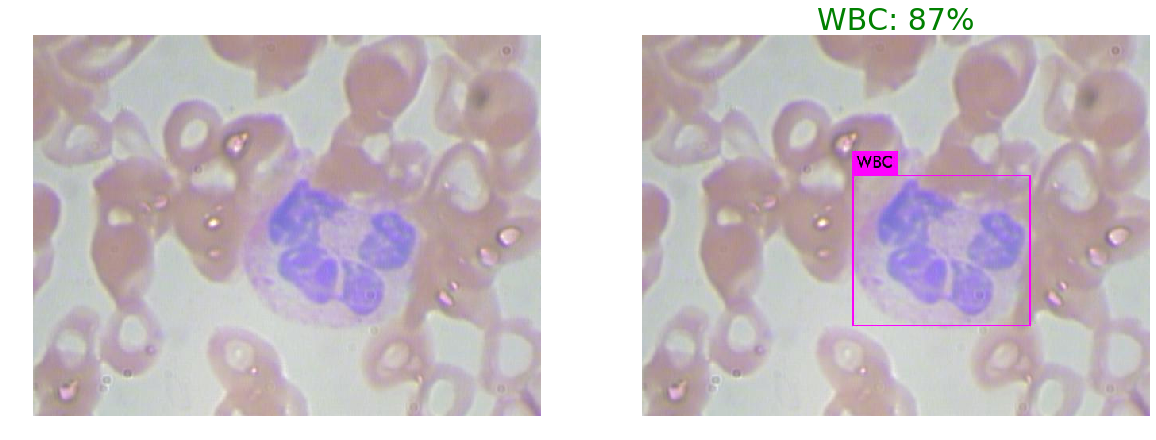

In [ ]:
PredictandShow('/content/drive/My Drive/Projects/BCCD/images/BloodImage_00000.jpg')

**Unseen Images**

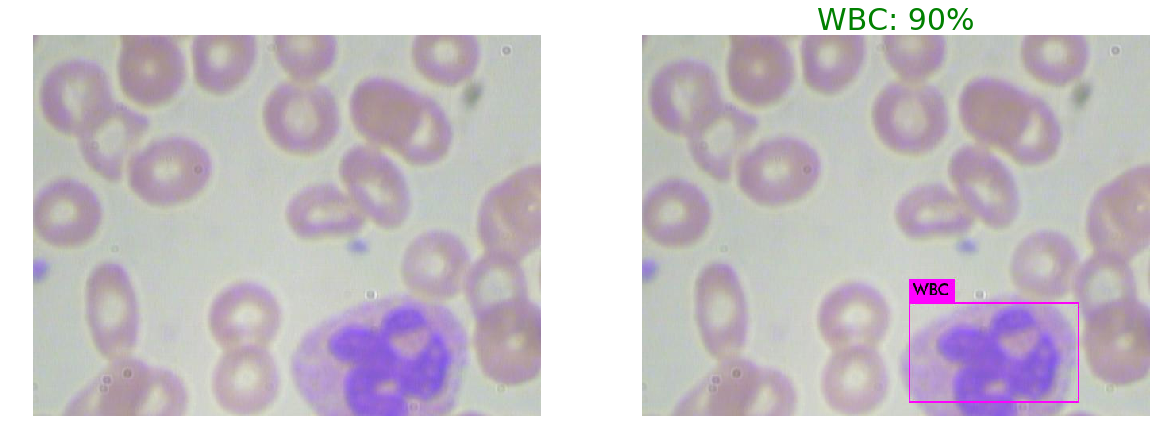

In [ ]:
PredictandShow('/content/drive/My Drive/Projects/BCCD/test_images/BloodImage_00408.jpg')

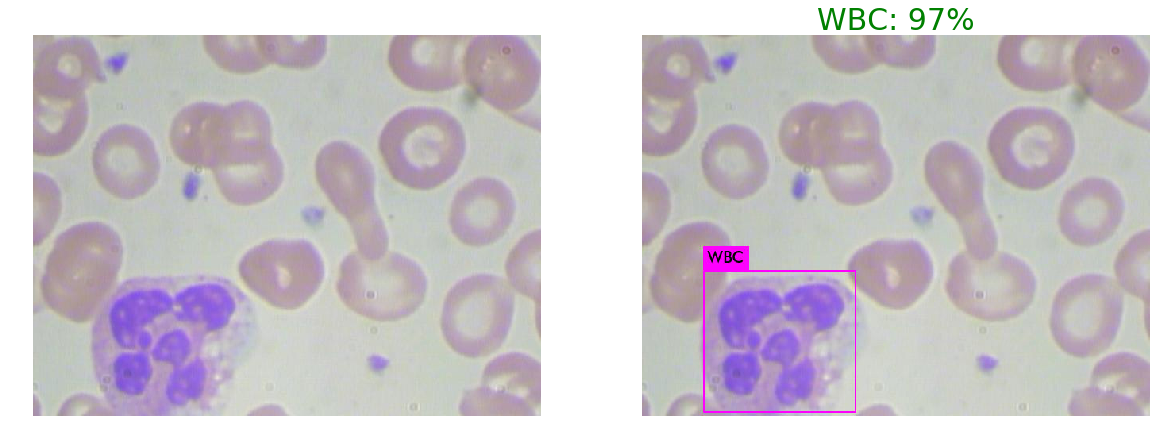

In [ ]:
PredictandShow('/content/drive/My Drive/Projects/BCCD/test_images/BloodImage_00409.jpg')

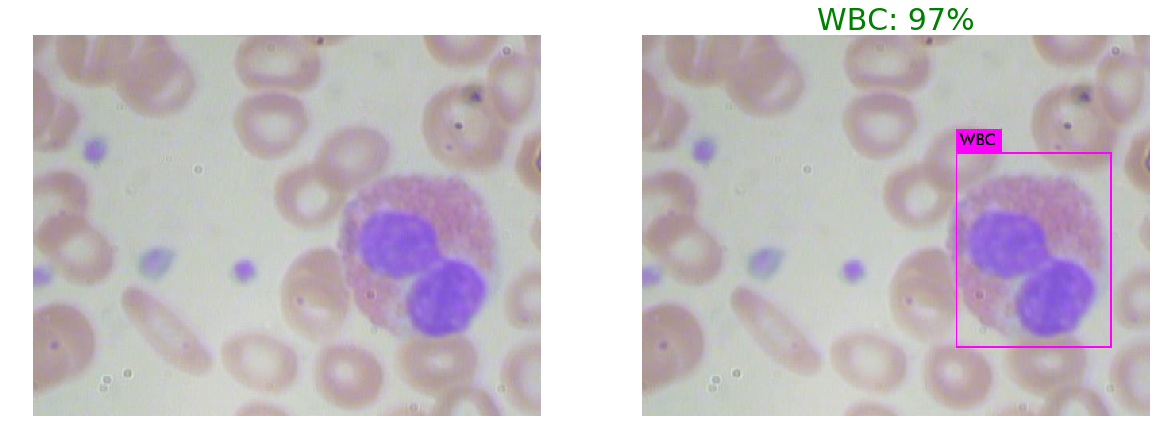

In [ ]:
PredictandShow('/content/drive/My Drive/Projects/BCCD/test_images/BloodImage_00410.jpg')

# ActualvsPredicted

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from matplotlib import patches

objdata = '/content/drive/My Drive/Projects/BCCD/WBC-obj.data'
yolov3cfg = '/content/drive/My Drive/Projects/BCCD/yolo_custom.cfg'
saved_weights = '/content/drive/My Drive/Projects/darknet_bloodcells/backup/yolo_custom_last.weights'

def ActualvsPredict(image_loc, image_name):
  original_img = cv2.imread(image_loc)
  original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
  result = !./darknet detector test '$objdata' 'yolov3cfg' 'saved_weights' '$image_loc' -dont_show
                   
  newImage = cv2.imread('predictions.jpg')
  newImage = cv2.cvtColor(newImage, cv2.COLOR_BGR2RGB)
  #add axes to the image
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.axis('off')

  # read and plot the image
  data = pd.read_excel('/content/drive/My Drive/Projects/BCCD/annotations_df.xlsx')
  #image = plt.imread('/content/drive/My Drive/Projects/yolo_custom/images/BloodImage_00003.jpg')
  image = newImage
  plt.imshow(image)

  # iterating over the image for different objects
  for _,row in data[data.prev_filename == image_name].iterrows():
      xmin = row.xmin
      xmax = row.xmax
      ymin = row.ymin
      ymax = row.ymax
      
      width = xmax - xmin
      height = ymax - ymin
      
      # assign different color to different classes of objects
      if row.cell_type == 'RBC':
          edgecolor = None
          ax.annotate('', xy=(xmax-40,ymin+20))
      elif row.cell_type == 'WBC':
          edgecolor = 'g'
          ax.annotate('WBC', xy=(xmax-40,ymin+20))
      elif row.cell_type == 'Platelets':
          edgecolor = None
          ax.annotate('', xy=(xmax-40,ymin+20))
          
      # add bounding boxes to the image
      rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
      
      ax.add_patch(rect)

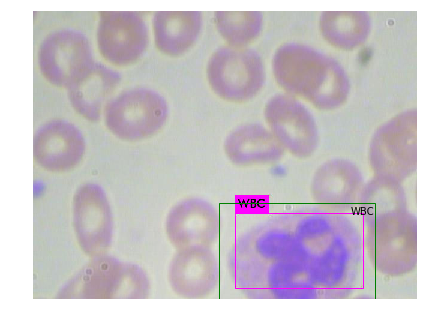

In [ ]:
ActualvsPredict('/content/drive/My Drive/Projects/BCCD/test_images/BloodImage_00408.jpg', 'BloodImage_00408.jpg')

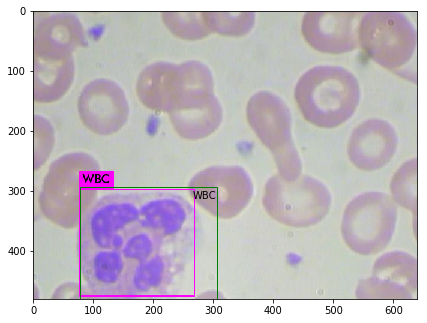

In [ ]:
ActualvsPredict('/content/drive/My Drive/Projects/BCCD/test_images/BloodImage_00409.jpg', 'BloodImage_00409.jpg')

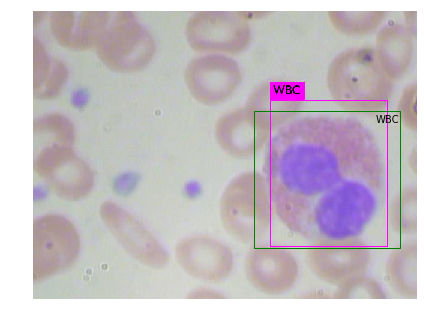

In [ ]:
ActualvsPredict('/content/drive/My Drive/Projects/BCCD/test_images/BloodImage_00410.jpg', 'BloodImage_00410.jpg')

**Related Links**

https://github.com/DatascienceAuthority/Bloodcells-Detection-YOLOV3

https://github.com/Shenggan/BCCD_Dataset/tree/master/BCCD